In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")                                                          

In [18]:
print(df.head())
print(df.shape)         # First 5 rows

   VIN (1-10)    County        City State  Postal Code  Model Year       Make  \
0  1C4JJXP68P    Yakima      Yakima    WA      98901.0        2023       JEEP   
1  1G1FY6S03L    Kitsap    Kingston    WA      98346.0        2020  CHEVROLET   
2  KNDCE3LG9K      King     Seattle    WA      98125.0        2019        KIA   
3  1N4AZ0CP8E  Thurston     Olympia    WA      98506.0        2014     NISSAN   
4  5YJXCAE29L    Kitsap  Silverdale    WA      98383.0        2020      TESLA   

      Model                   Electric Vehicle Type  \
0  WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
1   BOLT EV          Battery Electric Vehicle (BEV)   
2      NIRO          Battery Electric Vehicle (BEV)   
3      LEAF          Battery Electric Vehicle (BEV)   
4   MODEL X          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0             Not eligible due to low battery range            21.0   
1           Clean Alternative Fuel Vehic

In [7]:
print(df.info())               # Data types and non-null counts
print(df.shape)                # (rows , columns )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239747 entries, 0 to 239746
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         239747 non-null  object 
 1   County                                             239744 non-null  object 
 2   City                                               239744 non-null  object 
 3   State                                              239747 non-null  object 
 4   Postal Code                                        239744 non-null  float64
 5   Model Year                                         239747 non-null  int64  
 6   Make                                               239747 non-null  object 
 7   Model                                              239747 non-null  object 
 8   Electric Vehicle Type                              239747 non-null  object

In [33]:
print(df.describe()) 
print(df.shape)          # Summary stats of numeric columns

         Postal Code     Model Year  Electric Range      Base MSRP  \
count  239744.000000  239747.000000   239698.000000  239698.000000   
mean    98176.643908    2021.460681       45.562283     770.534110   
std      2538.393709       2.995484       83.432590    7096.684269   
min      1731.000000    2000.000000        0.000000       0.000000   
25%     98052.000000    2020.000000        0.000000       0.000000   
50%     98126.000000    2023.000000        0.000000       0.000000   
75%     98375.000000    2024.000000       38.000000       0.000000   
max     99577.000000    2026.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         239232.000000    2.397470e+05       2.397440e+05  
mean              28.876643    2.363185e+08       5.297838e+10  
std               14.896805    6.765169e+07       1.557184e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               17.000000    2.071293e+08 

In [36]:
print(df.columns)            # Column names

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')


---->> Mean and Standard Deviation (Task 1)

In [11]:
mean_range = df['Electric Range'].mean()
std_range = df['Electric Range'].std()

print("Mean Electric Range:", mean_range)
print("Standard Deviation of Electric Range:", std_range)

Mean Electric Range: 45.5622825388614
Standard Deviation of Electric Range: 83.43259037528223


------>> TASK 2 Appropriate Statistic
If data is normally distributed, use mean. If skewed, use median.

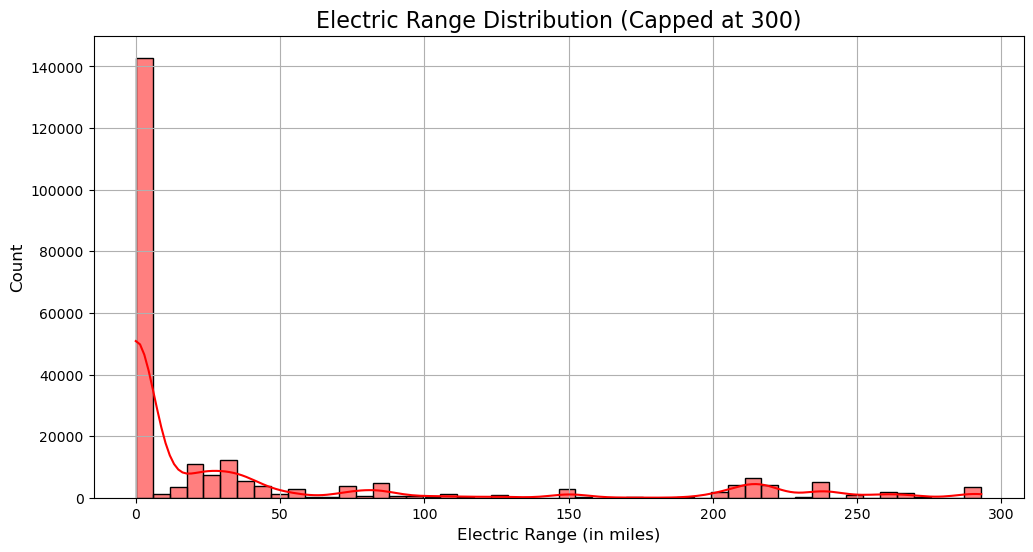

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier limit set kar rahe hai (max 300 hi dikhaenge)
filtered_data = df[df['Electric Range'] <= 300]

plt.figure(figsize=(12, 6))  # Bigger and wider figure
sns.histplot(filtered_data['Electric Range'], kde=True, bins=50, color='red')

plt.title("Electric Range Distribution (Capped at 300)", fontsize=16)
plt.xlabel("Electric Range (in miles)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(True)
plt.show()


“As seen from the histogram, most of the vehicles have 0 electric range, which creates a huge spike at the start. This causes the distribution to be highly right-skewed with a long tail on the right. To visualize it better, we filtered out values above 300. Hence, the median (0.0) was used as the central tendency.”

📦 Boxplot: Electric Range

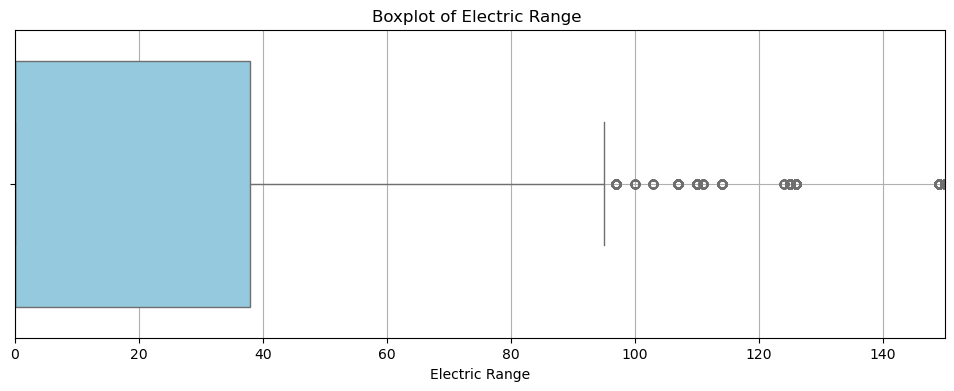

In [40]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='Electric Range', data=df, color='skyblue')
plt.title("Boxplot of Electric Range ")
plt.xlabel("Electric Range")
plt.xlim(0, 150)  # Focus on most data
plt.grid(True)
plt.show()

“Boxplot shows the median, 25th–75th percentiles, and outliers.”

“Electric range is right-skewed, as most vehicles have low range and few have very high.”

“We used a boxplot here because it effectively shows distribution and skewness.”

------>> TASK 4 EDA (Exploratory Data Analysis)

In [19]:
print(df.isnull().sum())     # Missing Values

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        49
Base MSRP                                             49
Legislative District                                 515
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [44]:
print(df['Make'].value_counts())        # Which brand is most used
print(df['Electric Vehicle Type'].value_counts())
print(df['Model Year'].value_counts())
print(df.shape)

Make
TESLA                     101675
CHEVROLET                  17462
NISSAN                     15607
FORD                       12851
KIA                        11747
BMW                         9868
TOYOTA                      9783
HYUNDAI                     7639
RIVIAN                      7000
JEEP                        6191
VOLKSWAGEN                  6155
VOLVO                       6051
AUDI                        4412
CHRYSLER                    3785
MERCEDES-BENZ               2487
HONDA                       2219
SUBARU                      2108
PORSCHE                     1555
POLESTAR                    1315
CADILLAC                    1191
MINI                        1133
MITSUBISHI                  1105
MAZDA                       1068
LEXUS                       1022
FIAT                         829
DODGE                        805
LUCID                        405
LINCOLN                      372
GMC                          371
GENESIS                      369
SMART

------>> 📊 Top 10 EV Brands: 

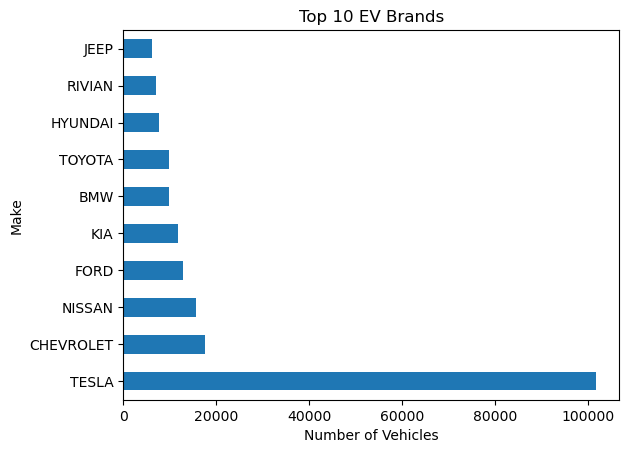

In [21]:
top_brands = df['Make'].value_counts().nlargest(10)
top_brands.plot(kind='barh', title='Top 10 EV Brands')
plt.xlabel("Number of Vehicles")
plt.show()

----->> 📈 Year-wise Adoption:

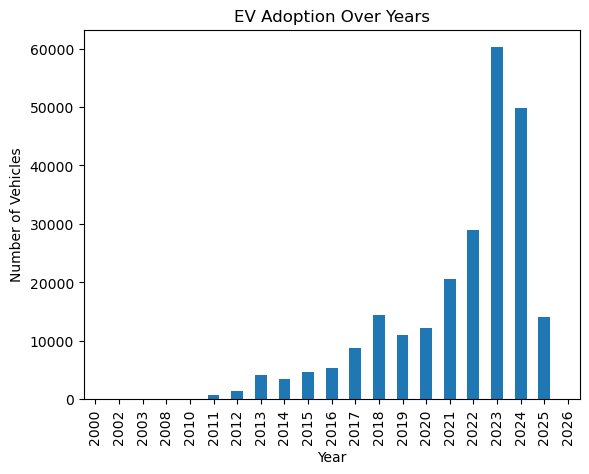

In [22]:
df['Model Year'].value_counts().sort_index().plot(kind='bar', title='EV Adoption Over Years')
plt.xlabel("Year")
plt.ylabel("Number of Vehicles")
plt.show()

🌐 EV Adoption by City:

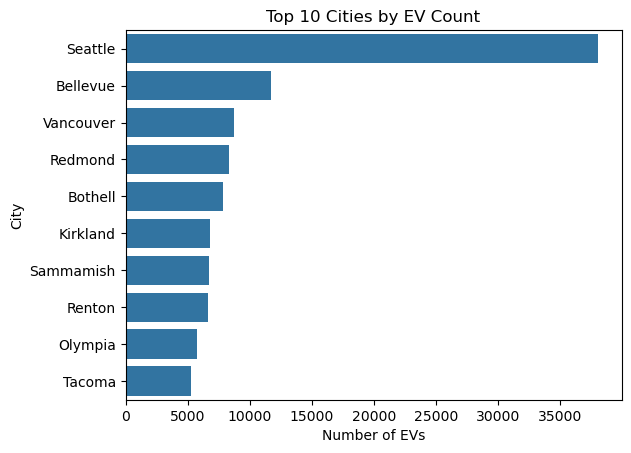

In [26]:
city_counts = df['City'].value_counts().nlargest(10)
sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title("Top 10 Cities by EV Count")
plt.xlabel("Number of EVs")
plt.ylabel("City")
plt.show()

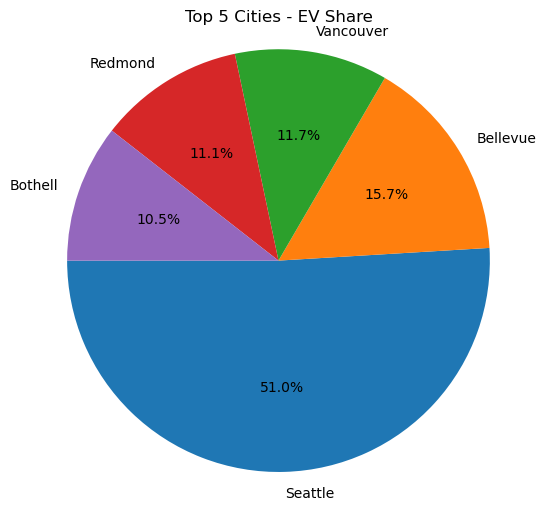

In [14]:
top5 = df['City'].value_counts().head(5)
plt.figure(figsize=(6, 6))
plt.pie(top5, labels=top5.index, autopct='%1.1f%%', startangle=180)
plt.title("Top 5 Cities - EV Share")
plt.axis('equal')
plt.show()

Scatter Plot: Electric Range vs Model Year

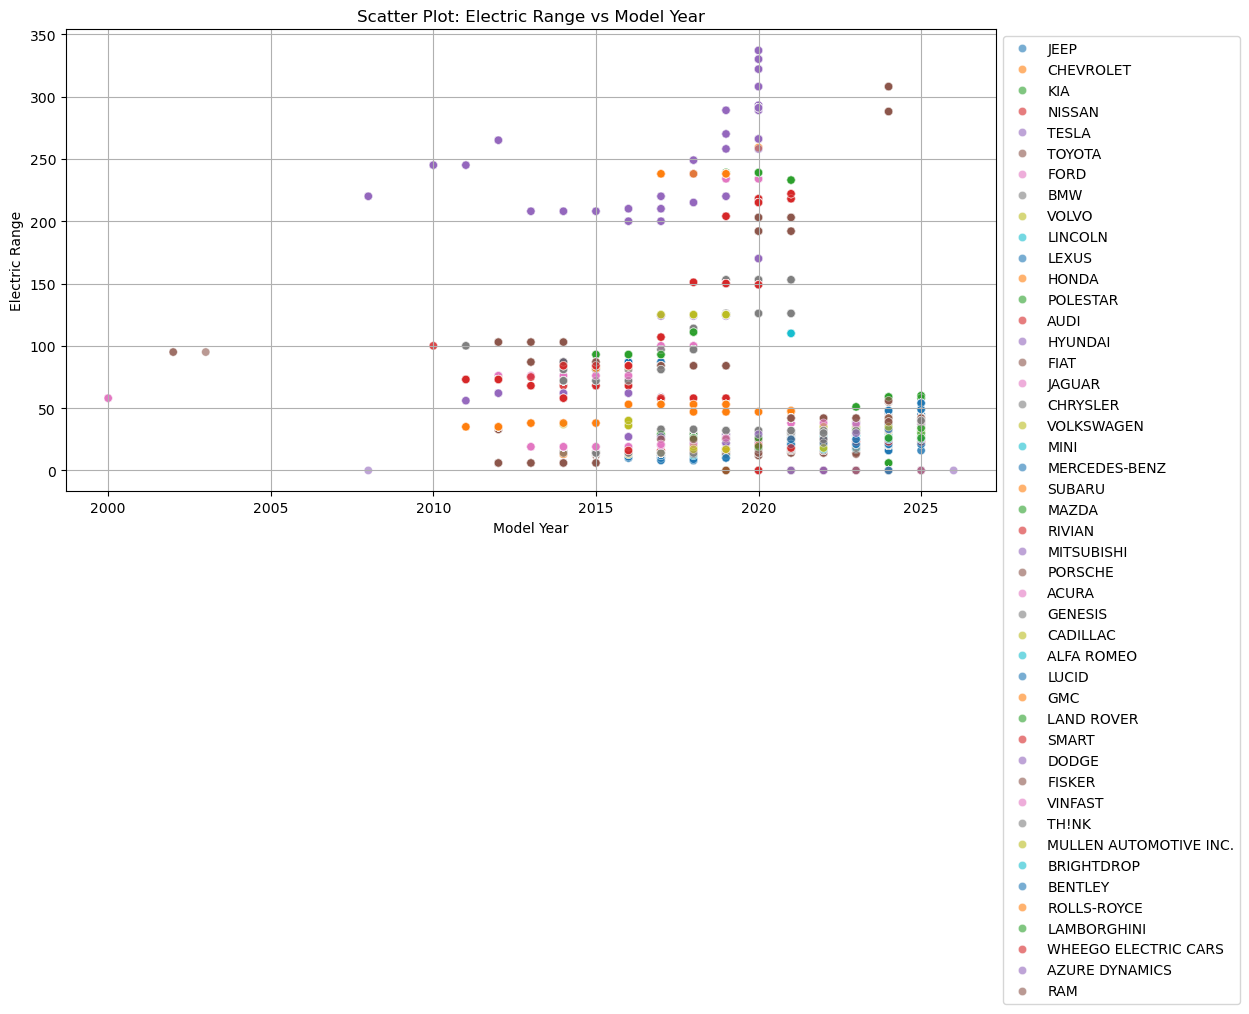

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Model Year', y='Electric Range', hue='Make', alpha=0.6, palette='tab10')
plt.title("Scatter Plot: Electric Range vs Model Year")
plt.xlabel("Model Year")
plt.ylabel("Electric Range")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()